## In this notebook I made an observation between the generalization of the Dense Sequential model on the Mnist dataset when compared to the keras Functional API Convolutional Nets

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess the Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values (0-255 to 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0


In [24]:
print(x_train.shape)

(60000, 28, 28, 1)


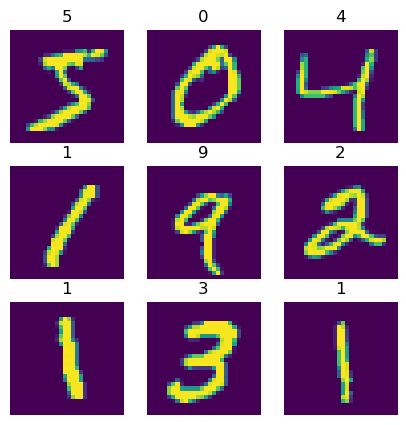

In [17]:
plt.figure(figsize=(5, 5))
for i in range(9) : 
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.axis("off")
#     plt.show()

In [53]:

# Reshape the data to fit the convolutional network 
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

input_layer = tf.keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
output_layer = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_layer, outputs=output_layer)


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=32, validation_split=0.2, batch_size = 1000)


Epoch 1/32
48/48 [==============================] - 2s 28ms/step - loss: 0.7382 - accuracy: 0.7999 - val_loss: 0.2215 - val_accuracy: 0.9341
Epoch 2/32
48/48 [==============================] - 1s 24ms/step - loss: 0.1708 - accuracy: 0.9495 - val_loss: 0.1221 - val_accuracy: 0.9663
Epoch 3/32
48/48 [==============================] - 1s 24ms/step - loss: 0.1021 - accuracy: 0.9699 - val_loss: 0.0842 - val_accuracy: 0.9752
Epoch 4/32
48/48 [==============================] - 1s 24ms/step - loss: 0.0756 - accuracy: 0.9774 - val_loss: 0.0736 - val_accuracy: 0.9783
Epoch 5/32
48/48 [==============================] - 1s 24ms/step - loss: 0.0624 - accuracy: 0.9815 - val_loss: 0.0684 - val_accuracy: 0.9804
Epoch 6/32
48/48 [==============================] - 1s 23ms/step - loss: 0.0524 - accuracy: 0.9843 - val_loss: 0.0559 - val_accuracy: 0.9839
Epoch 7/32
48/48 [==============================] - 1s 24ms/step - loss: 0.0471 - accuracy: 0.9857 - val_loss: 0.0561 - val_accuracy: 0.9840
Epoch 8/32
48

In [54]:
x_trainn = x_train.reshape(-1, 784)
x_testt = x_test.reshape(-1, 784)
# y_trainn = y_train.reshape(-1,)
# y_trainn = y_test.reshape(-1, 1)
smodel = tf.keras.models.Sequential([
    layers.Dense(128, activation= 'relu', input_shape=(784,)),
    layers.Dense(64, activation = 'relu', ), 
    layers.Dense(10, activation = "softmax")
])
smodel.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics =["accuracy"])

In [55]:
shistory = smodel.fit(x_trainn, y_train, validation_split = 0.2, epochs = 32, verbose = 2, batch_size = 1000)

Epoch 1/32
48/48 - 1s - loss: 0.9476 - accuracy: 0.7508 - val_loss: 0.3254 - val_accuracy: 0.9082 - 649ms/epoch - 14ms/step
Epoch 2/32
48/48 - 0s - loss: 0.2894 - accuracy: 0.9176 - val_loss: 0.2389 - val_accuracy: 0.9323 - 237ms/epoch - 5ms/step
Epoch 3/32
48/48 - 0s - loss: 0.2251 - accuracy: 0.9366 - val_loss: 0.1985 - val_accuracy: 0.9444 - 207ms/epoch - 4ms/step
Epoch 4/32
48/48 - 0s - loss: 0.1864 - accuracy: 0.9469 - val_loss: 0.1814 - val_accuracy: 0.9500 - 208ms/epoch - 4ms/step
Epoch 5/32
48/48 - 0s - loss: 0.1590 - accuracy: 0.9547 - val_loss: 0.1600 - val_accuracy: 0.9542 - 227ms/epoch - 5ms/step
Epoch 6/32
48/48 - 0s - loss: 0.1369 - accuracy: 0.9604 - val_loss: 0.1442 - val_accuracy: 0.9583 - 226ms/epoch - 5ms/step
Epoch 7/32
48/48 - 0s - loss: 0.1198 - accuracy: 0.9657 - val_loss: 0.1331 - val_accuracy: 0.9620 - 229ms/epoch - 5ms/step
Epoch 8/32
48/48 - 0s - loss: 0.1077 - accuracy: 0.9691 - val_loss: 0.1271 - val_accuracy: 0.9644 - 216ms/epoch - 4ms/step
Epoch 9/32
48/4

In [56]:
test_loss, test_acc = smodel.evaluate(x_testt, y_test)
print(f"Test Accuracy when using Sequential model: {test_acc:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0852 - accuracy: 0.9755
Test Accuracy when using Sequential model: 0.9755


In [57]:

# Step 5: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy when using Convolutional Network: {test_acc:.4f}")



313/313 [==============================] - 1s 3ms/step - loss: 0.0300 - accuracy: 0.9906
Test Accuracy when using Convolutional Network: 0.9906


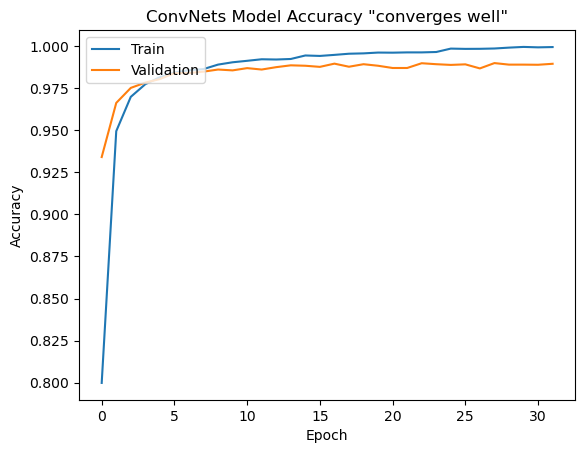

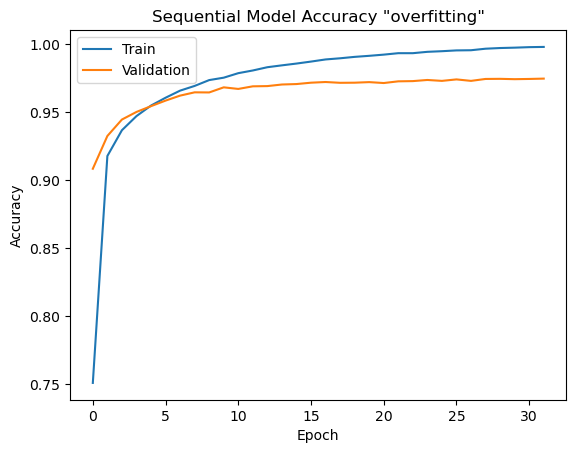

In [58]:

# Plotting here training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ConvNets Model Accuracy "converges well"')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(shistory.history['accuracy'])
plt.plot(shistory.history['val_accuracy'])
plt.title('Sequential Model Accuracy "overfitting"')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

